Centroid 0: [5.08561248e+04 4.62224554e-01 5.41448059e-01 5.15146905e+01
 2.69104407e+02 2.42166842e+01 1.44624344e+02 3.49800630e+01
 2.50351522e+01 4.09685205e+01 2.32318993e+00 3.91185729e+00
 2.39192025e+00 5.73662120e+00 5.32056663e+00 4.51206716e-02
 5.50891920e-02 3.72507870e-02 3.41028332e-02 5.24658972e-03
 9.44386149e-03]
Centroid 1: [6.01858361e+04 3.41317365e-01 3.05389222e-01 3.53832335e+01
 5.02703593e+02 3.82035928e+01 2.94353293e+02 5.20508982e+01
 3.86347305e+01 6.14461078e+01 2.33532934e+00 5.07185629e+00
 4.20359281e+00 6.09580838e+00 5.29341317e+00 2.30538922e-01
 1.85628743e-01 2.75449102e-01 2.36526946e-01 5.98802395e-02
 8.98203593e-03]
Spread 0: [2.50937828e+04 5.44831755e-01 5.45527269e-01 2.85116100e+01
 3.05079126e+02 3.81817429e+01 2.05246072e+02 5.28563817e+01
 3.99905724e+01 5.05627622e+01 1.89948287e+00 2.77951508e+00
 2.79898756e+00 3.27666107e+00 2.40071843e+00 2.07568775e-01
 2.28154274e-01 1.89375727e-01 1.81493333e-01 7.22430828e-02
 9.67195687e-02]


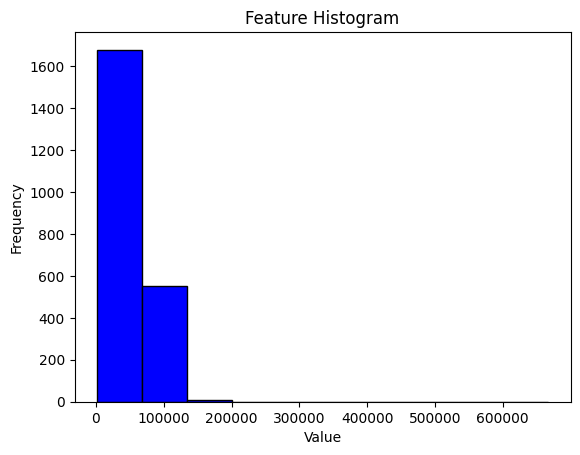

Mean: 52247.25135379061
Variance: 626611424.8638378


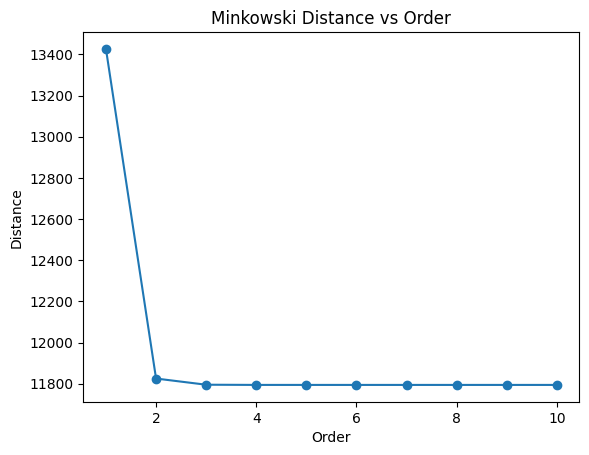

Accuracy: 0.8363095238095238
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0

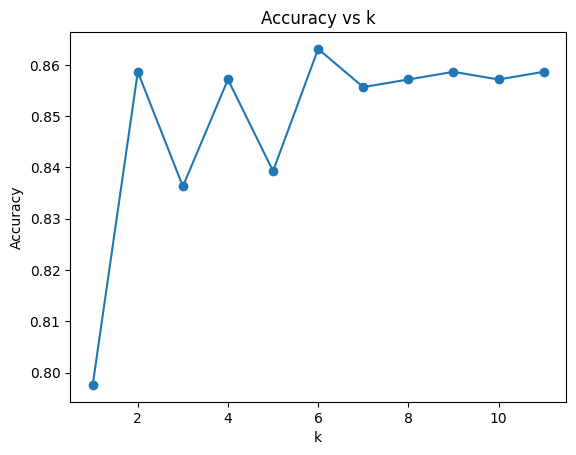

Confusion Matrix:
 [[541  36]
 [ 74  21]]
Precision: 0.3684210526315789
Recall: 0.22105263157894736
F1-Score: 0.27631578947368424


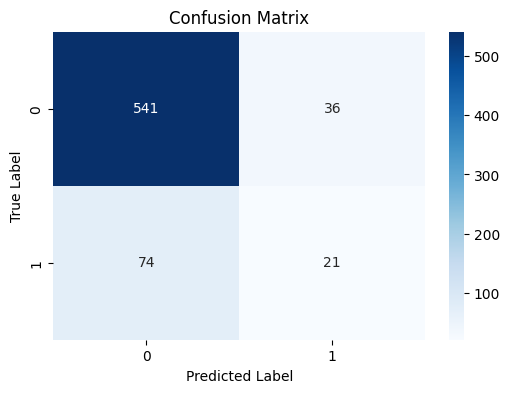

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import pandas as pd

# A1: Evaluate Intraclass Spread and Interclass Distances
def compute_centroid(dataset):
    return np.mean(dataset, axis=0)

def compute_spread(dataset):
    return np.std(dataset, axis=0)

def compute_interclass_distance(center1, center2):
    return np.linalg.norm(center1 - center2)

# A2: Observe Density Pattern Using Histogram
def generate_histogram(attribute, bins=10):
    avg = np.mean(attribute)
    var = np.var(attribute)
    plt.hist(attribute, bins=bins, color='blue', edgecolor='black')
    plt.title("Feature Histogram")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    return avg, var

# A3: Calculate Minkowski Distance
def compute_minkowski_distance(vector1, vector2, order):
    return np.power(np.sum(np.abs(vector1 - vector2) ** order), 1 / order)

def visualize_minkowski_distances(vector1, vector2, orders):
    distances = [compute_minkowski_distance(vector1, vector2, order) for order in orders]
    plt.plot(orders, distances, marker='o')
    plt.title("Minkowski Distance vs Order")
    plt.xlabel("Order")
    plt.ylabel("Distance")
    plt.show()

# A4–A7: Train-Test Split, kNN Classifier, Accuracy, and Predictions
def build_knn(train_X, train_y, neighbors=3):
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(train_X, train_y)
    return knn_model

def compute_accuracy(model, test_X, test_y):
    return model.score(test_X, test_y)

def predict_labels(model, test_X):
    return model.predict(test_X)

# A8: Compare kNN with Different k Values
def analyze_k_values(train_X, train_y, test_X, test_y, k_options):
    scores = []
    for neighbors in k_options:
        model = build_knn(train_X, train_y, neighbors)
        scores.append(compute_accuracy(model, test_X, test_y))
    plt.plot(k_options, scores, marker='o')
    plt.title("Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.show()

# A9: Evaluate Confusion Matrix and Performance Metrics
def assess_metrics(true_y, predicted_y):
    matrix = confusion_matrix(true_y, predicted_y)
    precision = precision_score(true_y, predicted_y)
    recall = recall_score(true_y, predicted_y)
    f1 = f1_score(true_y, predicted_y)
    return matrix, precision, recall, f1

# Main Program
if __name__ == "__main__":
    # Load marketing_campaign data
    file_path = "/content/Lab Session Data.xlsx"
    dataset = pd.read_excel(file_path, sheet_name='marketing_campaign')

    # Preprocessing: Select features and target variable
    features = dataset.select_dtypes(include=[np.number]).drop(columns=['Response', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'])
    target = dataset['Response']

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

    # A1: Intraclass Spread and Interclass Distances
    class0_data = features[target == 0].values
    class1_data = features[target == 1].values
    centroid0 = compute_centroid(class0_data)
    centroid1 = compute_centroid(class1_data)
    spread0 = compute_spread(class0_data)
    spread1 = compute_spread(class1_data)
    interclass_dist = compute_interclass_distance(centroid0, centroid1)

    print("Centroid 0:", centroid0)
    print("Centroid 1:", centroid1)
    print("Spread 0:", spread0)
    print("Spread 1:", spread1)
    print("Interclass Distance:", interclass_dist)

    # A2: Histogram and Density Pattern
    selected_feature = features.iloc[:, 0]  # Select the first feature
    avg, var = generate_histogram(selected_feature)
    print("Mean:", avg)
    print("Variance:", var)

    # A3: Minkowski Distance
    vector0 = class0_data[0]
    vector1 = class1_data[0]
    order_values = range(1, 11)
    visualize_minkowski_distances(vector0, vector1, order_values)

    # A4: Train-Test Split
    train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.3, random_state=42)

    # A5: Train kNN Classifier (k=3)
    knn_classifier = build_knn(train_X, train_y, neighbors=3)

    # A6: Test Accuracy
    model_accuracy = compute_accuracy(knn_classifier, test_X, test_y)
    print("Accuracy:", model_accuracy)

    # A7: Predict Classes
    predictions = predict_labels(knn_classifier, test_X)
    print("Predictions:", predictions)

    # A8: Compare kNN with Different k Values
    k_range = range(1, 12)
    analyze_k_values(train_X, train_y, test_X, test_y, k_range)

    # A9: Confusion Matrix and Performance Metrics
    matrix, precision, recall, f1 = assess_metrics(test_y, predictions)
    print("Confusion Matrix:\n", matrix)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    # Display Confusion Matrix as a Heatmap
    import seaborn as sns
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()



In [6]:
# Compute train accuracy
train_accuracy = knn_classifier.score(train_X,train_y)
test_accuracy = knn_classifier.score(test_X, test_y)

print("\nTrain Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Check for overfitting or underfitting
if train_accuracy > test_accuracy + 0.1:
    print("\nModel is Overfitting.")
elif test_accuracy > train_accuracy + 0.1:
    print("\nModel is Underfitting.")
else:
    print("\nModel has a Regular Fit.")



Train Accuracy: 0.8954081632653061
Test Accuracy: 0.8363095238095238

Model has a Regular Fit.
